# *Data Manipulation with pandas*

In [3]:
import pandas as pd
import numpy as np 
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
#the dataset used for this notebook differs from DataCamp's yet the order and structure of exercises is the same

In [5]:
path = '/Users/patryknextdoor/Desktop/sql_ohlc.csv'

df = pd.read_csv(path)
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777824 entries, 0 to 777823
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  777824 non-null  object 
 1   Open       777824 non-null  float64
 2   High       777824 non-null  float64
 3   Low        777824 non-null  float64
 4   Close      777824 non-null  float64
 5   Volume     777824 non-null  float64
dtypes: float64(5), object(1)
memory usage: 35.6+ MB


In [7]:
df.shape

(777824, 6)

In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,777824.000000,777824.000000,777824.000000,777824.000000,777824.000000
mean,63292.780553,63303.550411,63282.038697,63292.876567,7.898409
std,1783.921160,1781.225581,1786.601299,1783.864356,16.842469
min,59916.540000,59916.550000,59828.110000,59867.660000,0.000000
25%,61859.500000,61866.350000,61851.990000,61859.500000,1.011440
50%,63287.360000,63298.010000,63274.120000,63287.370000,3.168455
75%,65224.000000,65235.510000,65208.537500,65224.000000,8.225035
max,66423.990000,66498.000000,66423.990000,66490.640000,802.216300


In [9]:
df.values

array([['2024-09-25 17:20:00', 63337.45, 63360.0, 63333.27, 63343.5,
        22.01725],
       ['2024-09-25 17:20:00', 63337.45, 63360.0, 63333.27, 63343.51,
        22.03303],
       ['2024-09-25 17:20:00', 63337.45, 63360.0, 63333.27, 63340.16,
        22.15788],
       ...,
       ['2024-10-07 16:35:00', 63735.88, 63760.0, 63735.88, 63759.99,
        1.9049],
       ['2024-10-07 16:35:00', 63735.88, 63760.0, 63735.88, 63759.99,
        1.95626],
       ['2024-10-07 16:35:00', 63735.88, 63760.0, 63735.88, 63760.0,
        1.95651]], dtype=object)

In [10]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=777824, step=1)

In [12]:
df.dtypes 

Timestamp     object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
dtype: object

## *Sorting and subseting*

In [13]:
#Sorting

df.sort_values("Volume" , ascending=False)

,Timestamp,Open,High,Low,Close,Volume
387076,2024-10-01 17:20:00,61614.44,61614.44,61234.00,61387.87,802.21630
387075,2024-10-01 17:20:00,61614.44,61614.44,61234.00,61371.61,792.97519
387074,2024-10-01 17:20:00,61614.44,61614.44,61234.00,61377.90,771.65453
387073,2024-10-01 17:20:00,61614.44,61614.44,61234.00,61378.36,765.51720
387072,2024-10-01 17:20:00,61614.44,61614.44,61234.00,61381.99,734.00741
...,...,...,...,...,...,...
3916,2024-09-25 18:51:00,63340.01,63340.01,63340.01,63340.01,0.00000
614183,2024-10-05 04:16:00,61824.01,61824.01,61824.01,61824.01,0.00000
713103,2024-10-06 16:32:00,62746.02,62746.02,62746.02,62746.02,0.00000
148708,2024-09-28 01:28:00,65837.99,65837.99,65837.99,65837.99,0.00000


In [14]:
df.sort_values(['Volume' , 'High'], ascending=[False, False]).head()

,Timestamp,Open,High,Low,Close,Volume
387076,2024-10-01 17:20:00,61614.44,61614.44,61234.0,61387.87,802.21630
387075,2024-10-01 17:20:00,61614.44,61614.44,61234.0,61371.61,792.97519
387074,2024-10-01 17:20:00,61614.44,61614.44,61234.0,61377.90,771.65453
387073,2024-10-01 17:20:00,61614.44,61614.44,61234.0,61378.36,765.51720
387072,2024-10-01 17:20:00,61614.44,61614.44,61234.0,61381.99,734.00741


In [15]:
# Subseting columns

df['Close']

0         63343.50
1         63343.51
2         63340.16
3         63340.15
4         63340.15
            ...   
777819    63759.99
777820    63759.99
777821    63759.99
777822    63759.99
777823    63760.00
Name: Close, Length: 777824, dtype: float64

In [16]:
df[['Timestamp', 'Close']]

,Timestamp,Close
0,2024-09-25 17:20:00,63343.50
1,2024-09-25 17:20:00,63343.51
2,2024-09-25 17:20:00,63340.16
3,2024-09-25 17:20:00,63340.15
4,2024-09-25 17:20:00,63340.15
...,...,...
777819,2024-10-07 16:35:00,63759.99
777820,2024-10-07 16:35:00,63759.99
777821,2024-10-07 16:35:00,63759.99
777822,2024-10-07 16:35:00,63759.99


In [17]:
cols_to_subset = ['Timestamp' , 'Volume']
df[cols_to_subset]

,Timestamp,Volume
0,2024-09-25 17:20:00,22.01725
1,2024-09-25 17:20:00,22.03303
2,2024-09-25 17:20:00,22.15788
3,2024-09-25 17:20:00,22.15983
4,2024-09-25 17:20:00,22.16027
...,...,...
777819,2024-10-07 16:35:00,1.86760
777820,2024-10-07 16:35:00,1.88560
777821,2024-10-07 16:35:00,1.90490
777822,2024-10-07 16:35:00,1.95626


In [18]:
# Subsetting rows

#1. Filtering by logical condition

df['Close'] > 63000

0         True
1         True
2         True
3         True
4         True
          ... 
777819    True
777820    True
777821    True
777822    True
777823    True
Name: Close, Length: 777824, dtype: bool

In [19]:
df[df['Close'] > 161.900 ]

,Timestamp,Open,High,Low,Close,Volume
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027
...,...,...,...,...,...,...
777819,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760
777820,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560
777821,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490
777822,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.95626


In [20]:
#2 Filtering based on text data

df['Order_Type'] = df['Open'].apply(lambda x: 'buy' if x > 160 else 'sell')
df


,Timestamp,Open,High,Low,Close,Volume,Order_Type
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725,buy
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303,buy
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788,buy
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983,buy
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027,buy
...,...,...,...,...,...,...,...
777819,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760,buy
777820,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560,buy
777821,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490,buy
777822,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.95626,buy


In [21]:
filtered_df = df[df['Order_Type'] == 'buy' ]
filtered_df.head()

,Timestamp,Open,High,Low,Close,Volume,Order_Type
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725,buy
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303,buy
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788,buy
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983,buy
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027,buy


In [22]:
#3 Subsetinng based on dates

filtered_df[filtered_df['Timestamp'] > '2024-07-11'].head()

,Timestamp,Open,High,Low,Close,Volume,Order_Type
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725,buy
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303,buy
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788,buy
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983,buy
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027,buy


In [23]:
#4 Subsetting based on multiple conditions

is_july = filtered_df['Timestamp'].str.startswith('2024-07')
is_volume = filtered_df['Volume'] > 11000

filtered_df[is_july & is_volume]

,Timestamp,Open,High,Low,Close,Volume,Order_Type


In [24]:
#or as a one liner 

filtered_df[ (filtered_df['Timestamp'].str.startswith('2024-07')) & (filtered_df['Volume'] > 11000) ]

,Timestamp,Open,High,Low,Close,Volume,Order_Type


## *Creating New Columns*

- mutating df
- transforming df
- feature engineering

In [25]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,Order_Type
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725,buy
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303,buy
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788,buy
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983,buy
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027,buy


In [26]:
df['Bid/Ask_Spread'] = (df['High'] - df['Low']) / 2.0

In [27]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,Order_Type,Bid/Ask_Spread
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725,buy,13.365
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303,buy,13.365
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788,buy,13.365
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983,buy,13.365
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027,buy,13.365


In [28]:
df['Log_Return'] = df['Close'].pct_change() * 100 

In [29]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume,Order_Type,Bid/Ask_Spread,Log_Return
777819,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760,buy,12.06,0.000000
777820,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560,buy,12.06,0.000000
777821,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490,buy,12.06,0.000000
777822,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.95626,buy,12.06,0.000000
777823,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63760.00,1.95651,buy,12.06,0.000016


In [30]:
df['Squared_Returns'] = df['Log_Return'] ** 2

In [31]:
df.head()

,Timestamp,Open,High,Low,Close,Volume,Order_Type,Bid/Ask_Spread,Log_Return,Squared_Returns
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725,buy,13.365,NaN,NaN
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303,buy,13.365,0.000016,2.492275e-10
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788,buy,13.365,-0.005289,2.796954e-05
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983,buy,13.365,-0.000016,2.492537e-10
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027,buy,13.365,0.000000,0.000000e+00


In [32]:
# side note :

# By applying a square root transformation to returns, particularly in cases where returns are not normally distributed 
# or exhibit heteroscedasticity (varying variance), the transformation can help stabilize the variance.

## *Summary Statistics with pandas*

In [33]:
# sumarizing numerical data

df.head()

,Timestamp,Open,High,Low,Close,Volume,Order_Type,Bid/Ask_Spread,Log_Return,Squared_Returns
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725,buy,13.365,NaN,NaN
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303,buy,13.365,0.000016,2.492275e-10
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788,buy,13.365,-0.005289,2.796954e-05
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983,buy,13.365,-0.000016,2.492537e-10
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027,buy,13.365,0.000000,0.000000e+00


In [34]:
df['Bid/Ask_Spread'].mean()

10.755856974071229

In [35]:
df['Bid/Ask_Spread'].mode()

0    0.005
Name: Bid/Ask_Spread, dtype: float64

In [36]:
df['Bid/Ask_Spread'].var()

177.559348486212

In [37]:
df['Bid/Ask_Spread'].std()

13.325139717324243

In [38]:
df['Bid/Ask_Spread'].max()

190.22000000000116

In [39]:
df['Bid/Ask_Spread'].min()

0.0

In [40]:
df['Bid/Ask_Spread'].quantile()

6.794999999998254

In [41]:
# summarizing dates

df['Timestamp'].min()

'2024-09-25 17:20:00'

In [42]:
df['Timestamp'].max()

'2024-10-07 16:35:00'

In [43]:
# agg method to map a a function onto specified column/rows

def pct30(column):
    return column.quantile(0.3)

In [44]:
def pct80(column):
    return column.quantile(0.8)

In [45]:

df['Close'].agg([pct30 , pct80])

pct30    62000.01
pct80    65541.99
Name: Close, dtype: float64

In [46]:
# cumulative sum

cum_sum = df['Volume'].cumsum()
cum_sum

0         2.201725e+01
1         4.405028e+01
2         6.620816e+01
3         8.836799e+01
4         1.105283e+02
              ...     
777819    6.143564e+06
777820    6.143566e+06
777821    6.143568e+06
777822    6.143570e+06
777823    6.143572e+06
Name: Volume, Length: 777824, dtype: float64

In [47]:
# additionally there are other cumulative stats like :    .cummax , cummin , cumprod

## *Counting*

In [48]:
# For this example i will use Faker for fake data generation for the DataFrame


In [49]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker for fake data generation
fake = Faker()

# Generate random Bloomberg-like financial data
data = []
for _ in range(30):
    ticker = fake.random_element(elements=('AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA'))
    company_name = fake.company()
    exchange = fake.random_element(elements=('NYSE', 'NASDAQ'))
    last_price = random.uniform(100, 2000)  # Last traded price
    market_cap = random.randint(1000000000, 2000000000000)  # Market capitalization in USD
    pe_ratio = random.uniform(5, 50)  # Price-to-earnings ratio
    dividend_yield = random.uniform(0, 5)  # Dividend yield (%)
    earnings_per_share = random.uniform(1, 20)  # Earnings per share
    volume = random.randint(1000000, 10000000)  # Trading volume
    beta = random.uniform(0.5, 2.0)  # Beta coefficient
    data.append([ticker, company_name, exchange, last_price, market_cap, pe_ratio, dividend_yield, earnings_per_share, volume, beta])

# Create DataFrame
df = pd.DataFrame(data, columns=['Ticker', 'Company Name', 'Exchange', 'Last Price', 'Market Cap', 'P/E Ratio', 'Dividend Yield (%)', 'EPS', 'Volume', 'Beta'])

# Adding duplicates to the DataFrame
df = pd.concat([df] * 2, ignore_index=True)  # Duplicates each row once

# Display the DataFrame


df.head(31)

,Ticker,Company Name,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
0,AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
1,AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
2,MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
3,AMZN,Dalton and Sons,NYSE,611.460719,857012704734,12.348895,3.210327,15.544875,7766922,1.047631
4,AMZN,Combs PLC,NYSE,1522.327115,379626726596,33.803458,0.696788,16.087221,6258949,1.049669
5,AAPL,Ramirez-Petty,NASDAQ,1496.834297,1984635143713,43.430224,1.002250,4.595889,4496164,1.708920
6,TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
7,GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716
8,AMZN,Garcia Ltd,NASDAQ,144.949532,192556535584,10.829368,2.756304,1.225362,8560592,1.060964
9,GOOGL,Brooks LLC,NYSE,1825.020164,1517742316154,20.513841,4.199283,2.796740,4313332,1.468890


In [50]:
## Dropping duplicate pairs

df = df.drop_duplicates(subset=[ "Ticker"])
df

,Ticker,Company Name,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
0,AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
1,AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
2,MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
6,TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
7,GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [51]:
# Counting 

df["Exchange"].value_counts()

Exchange
NYSE      3
NASDAQ    2
Name: count, dtype: int64

In [52]:
# turning counts into proportions of the total

df["Exchange"].value_counts(normalize=True)

Exchange
NYSE      0.6
NASDAQ    0.4
Name: proportion, dtype: float64

## *Grouped Summary Statistics*

In [53]:
df.groupby("Ticker")["Volume"].mean()

Ticker
AAPL     4718197.0
AMZN     6276746.0
GOOGL    6971673.0
MSFT     1486519.0
TSLA     7970420.0
Name: Volume, dtype: float64

In [54]:
df.groupby("Ticker")["Volume"].agg([min , max , sum])

,min,max,sum
Ticker,,,
AAPL,4718197,4718197,4718197
AMZN,6276746,6276746,6276746
GOOGL,6971673,6971673,6971673
MSFT,1486519,1486519,1486519
TSLA,7970420,7970420,7970420


In [55]:
df.groupby("Ticker")["Volume"].agg(sum)

Ticker
AAPL     4718197
AMZN     6276746
GOOGL    6971673
MSFT     1486519
TSLA     7970420
Name: Volume, dtype: int64

In [56]:
df.groupby("Company Name")[["Market Cap" , "Volume"]].agg([max , min , np.mean , np.median])

Market Cap                               \
                                     max            min          mean   
Company Name                                                            
Burke, Meyer and Hamilton   181952797148   181952797148  1.819528e+11   
Campbell Inc                 28452721922    28452721922  2.845272e+10   
Evans-Stout                1745393604827  1745393604827  1.745394e+12   
Peters-Davis                943942889920   943942889920  9.439429e+11   
Vega, Gibson and Ferguson   732835157655   732835157655  7.328352e+11   

                                          Volume                      \
                                 median      max      min       mean   
Company Name                                                           
Burke, Meyer and Hamilton  1.819528e+11  1486519  1486519  1486519.0   
Campbell Inc               2.845272e+10  4718197  4718197  4718197.0   
Evans-Stout                1.745394e+12  6971673  6971673  6971673.0   
Peters-Davis               9.439429e+11  6276746  6276746  6276746.0   
Vega, Gibson and Ferguson  7.328352e+11  7970420  7970420  7970420.0   

                                      
                              median  
Company Name                          
Burke, Meyer and Hamilton  1486519.0  
Campbell Inc               4718197.0  
Evans-Stout                6971673.0  
Peters-Davis               6276746.0  
Vega, Gibson and Ferguson  7970420.0

## *Pivot Tables in pandas*

In [57]:
df.pivot_table(values="Market Cap" , index="Ticker")

,Market Cap
Ticker,
AAPL,2.845272e+10
AMZN,9.439429e+11
GOOGL,1.745394e+12
MSFT,1.819528e+11
TSLA,7.328352e+11


In [58]:
# calculating cube root of market cap 

df.pivot_table(values="Market Cap" , index="Ticker" , aggfunc=np.cbrt)

,Market Cap
Ticker,
AAPL,3052.867389
AMZN,9809.538436
GOOGL,12040.128632
MSFT,5666.561137
TSLA,9015.754946


## *Slicing and Indexing DataFrames*

In [59]:
df

,Ticker,Company Name,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
0,AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
1,AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
2,MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
6,TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
7,GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [60]:
# setting a column as the index 

In [61]:
df_index = df.set_index("Ticker")
df_index

,Company Name,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
Ticker,,,,,,,,,
AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [62]:
# removing index

In [63]:
df_index = df.reset_index(drop=True)
df_index

,Ticker,Company Name,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
0,AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
1,AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
2,MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
3,TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
4,GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [64]:
# subsetting 

df

,Ticker,Company Name,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
0,AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
1,AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
2,MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
6,TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
7,GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [65]:
df_index

,Ticker,Company Name,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
0,AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
1,AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
2,MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
3,TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
4,GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [66]:
#filterings df for rows where the 

companies=['Hoover Ltd' , 'Wallace Inc']
print(df_index[df_index['Company Name'].isin(companies)])

Empty DataFrame
Columns: [Ticker, Company Name, Exchange, Last Price, Market Cap, P/E Ratio, Dividend Yield (%), EPS, Volume, Beta]
Index: []


In [67]:
# setting multiple indexes

df_index = df_index.set_index(["Ticker", "Company Name"])
df_index

,,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
Ticker,Company Name,,,,,,,,
AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [68]:
df_index

,,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
Ticker,Company Name,,,,,,,,
AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953
GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716


In [69]:
# sorting df by index values

df_index.sort_index()

,,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
Ticker,Company Name,,,,,,,,
AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716
MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953


In [70]:
df_index.sort_index(level="Company Name")

,,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
Ticker,Company Name,,,,,,,,
MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716
AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953


In [71]:
df_index.sort_index(level=["Company Name", "Ticker"], ascending = [True , False] )


,,Exchange,Last Price,Market Cap,P/E Ratio,Dividend Yield (%),EPS,Volume,Beta
Ticker,Company Name,,,,,,,,
MSFT,"Burke, Meyer and Hamilton",NASDAQ,925.404672,181952797148,22.054871,2.487544,5.378860,1486519,0.668379
AAPL,Campbell Inc,NYSE,1766.318537,28452721922,33.210871,0.444425,5.124576,4718197,0.861799
GOOGL,Evans-Stout,NYSE,1006.712952,1745393604827,6.486671,4.713896,7.617088,6971673,0.997716
AMZN,Peters-Davis,NYSE,1436.001522,943942889920,33.162024,1.235691,4.650125,6276746,1.848860
TSLA,"Vega, Gibson and Ferguson",NASDAQ,1114.722841,732835157655,16.463144,1.833368,8.989346,7970420,0.573953


In [72]:
# slicing and subsetting with loc and iloc

In [76]:
df_index.loc[: , "Market Cap":"P/E Ratio"]

,,Market Cap,P/E Ratio
Ticker,Company Name,,
AAPL,Campbell Inc,28452721922,33.210871
AMZN,Peters-Davis,943942889920,33.162024
MSFT,"Burke, Meyer and Hamilton",181952797148,22.054871
TSLA,"Vega, Gibson and Ferguson",732835157655,16.463144
GOOGL,Evans-Stout,1745393604827,6.486671


In [85]:
df_index.iloc[: , 1:3]

,,Last Price,Market Cap
Ticker,Company Name,,
AAPL,Campbell Inc,1766.318537,28452721922
AMZN,Peters-Davis,1436.001522,943942889920
MSFT,"Burke, Meyer and Hamilton",925.404672,181952797148
TSLA,"Vega, Gibson and Ferguson",1114.722841,732835157655
GOOGL,Evans-Stout,1006.712952,1745393604827


In [29]:
import matplotlib.pyplot as plt

In [2]:
# slicing time-series with boolean conditions
import pandas as pd
path = '/Users/patryknextdoor/Desktop/sql_ohlc.csv'

df = pd.read_csv(path)
df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Timestamp,Open,High,Low,Close,Volume
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027


In [23]:
df_bool = df[(df["Timestamp"] <= "2024-10-07") & (df["Timestamp"] >= "2024-10-06")]

In [24]:
df_bool

,Timestamp,Open,High,Low,Close,Volume
668199,2024-10-06 00:00:00,62058.01,62058.01,62058.0,62058.00,0.00472
668200,2024-10-06 00:00:00,62058.01,62058.01,62058.0,62058.01,0.32860
668201,2024-10-06 00:00:00,62058.01,62059.95,62058.0,62059.94,0.71126
668202,2024-10-06 00:00:00,62058.01,62059.95,62058.0,62059.95,0.75112
668203,2024-10-06 00:00:00,62058.01,62059.95,62058.0,62059.94,0.80241
...,...,...,...,...,...,...
733347,2024-10-06 23:59:00,62829.03,62829.03,62819.9,62819.91,2.13867
733348,2024-10-06 23:59:00,62829.03,62829.03,62819.9,62819.90,2.14920
733349,2024-10-06 23:59:00,62829.03,62829.03,62819.9,62819.91,2.15393
733350,2024-10-06 23:59:00,62829.03,62829.03,62819.9,62819.90,2.16208


In [25]:
df_index = df.set_index("Timestamp").sort_index()

In [26]:
df_index

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027
...,...,...,...,...,...
2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760
2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560
2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490


In [28]:
df_index.loc["2024-10-07 00:00:00":"2024-10-07 12:00:00"]

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-10-07 00:00:00,62819.91,62819.91,62819.91,62819.91,0.17591
2024-10-07 00:00:00,62819.91,62819.91,62819.91,62819.91,0.17591
2024-10-07 00:00:00,62819.91,62819.91,62819.90,62819.91,0.25843
2024-10-07 00:00:00,62819.91,62819.91,62819.90,62819.91,0.30299
2024-10-07 00:00:00,62819.91,62826.00,62819.90,62826.00,0.77080
...,...,...,...,...,...
2024-10-07 12:00:00,63135.45,63135.45,63068.90,63072.67,29.06966
2024-10-07 12:00:00,63135.45,63135.45,63068.90,63072.67,29.09048
2024-10-07 12:00:00,63135.45,63135.45,63068.90,63072.67,29.09063


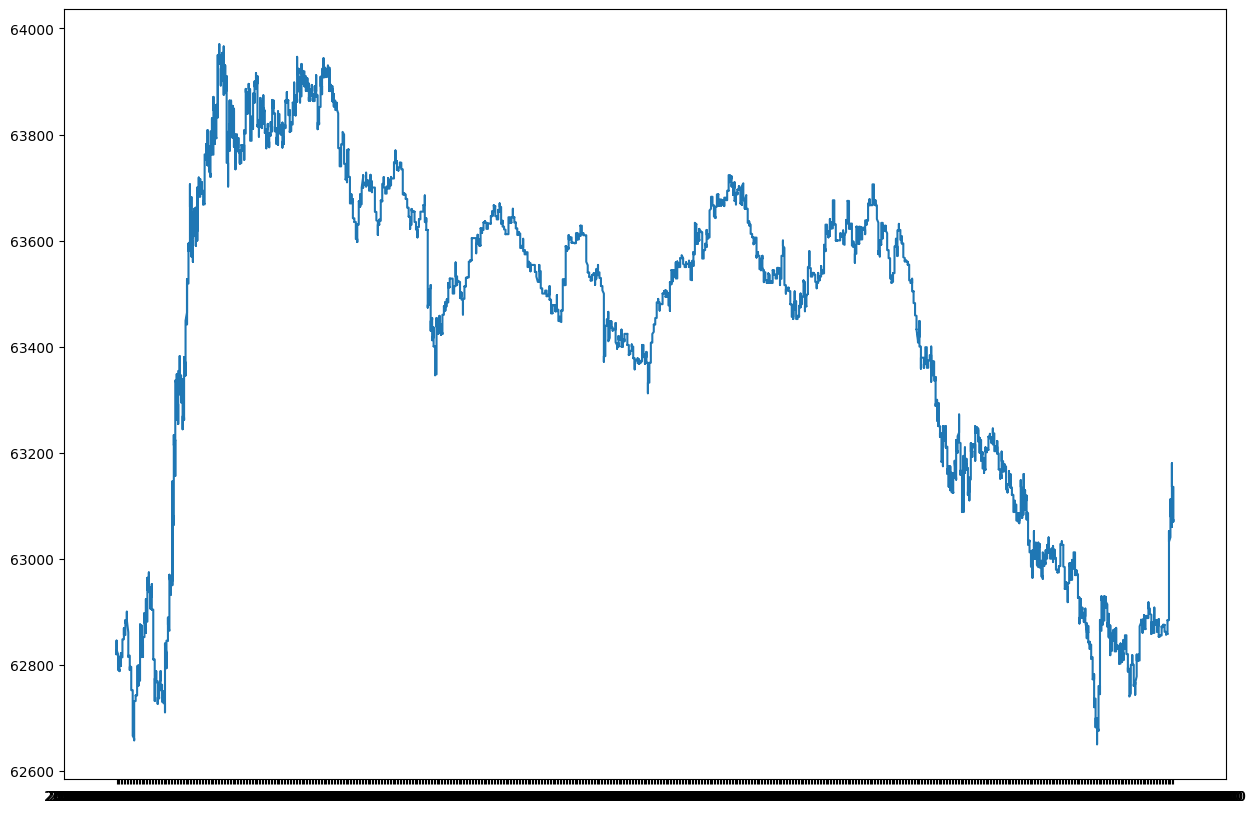

In [33]:
plt.figure(figsize=(15,10))
plt.plot(df_index["Close"].loc["2024-10-07 00:00:00":"2024-10-07 12:00:00"])
plt.show()

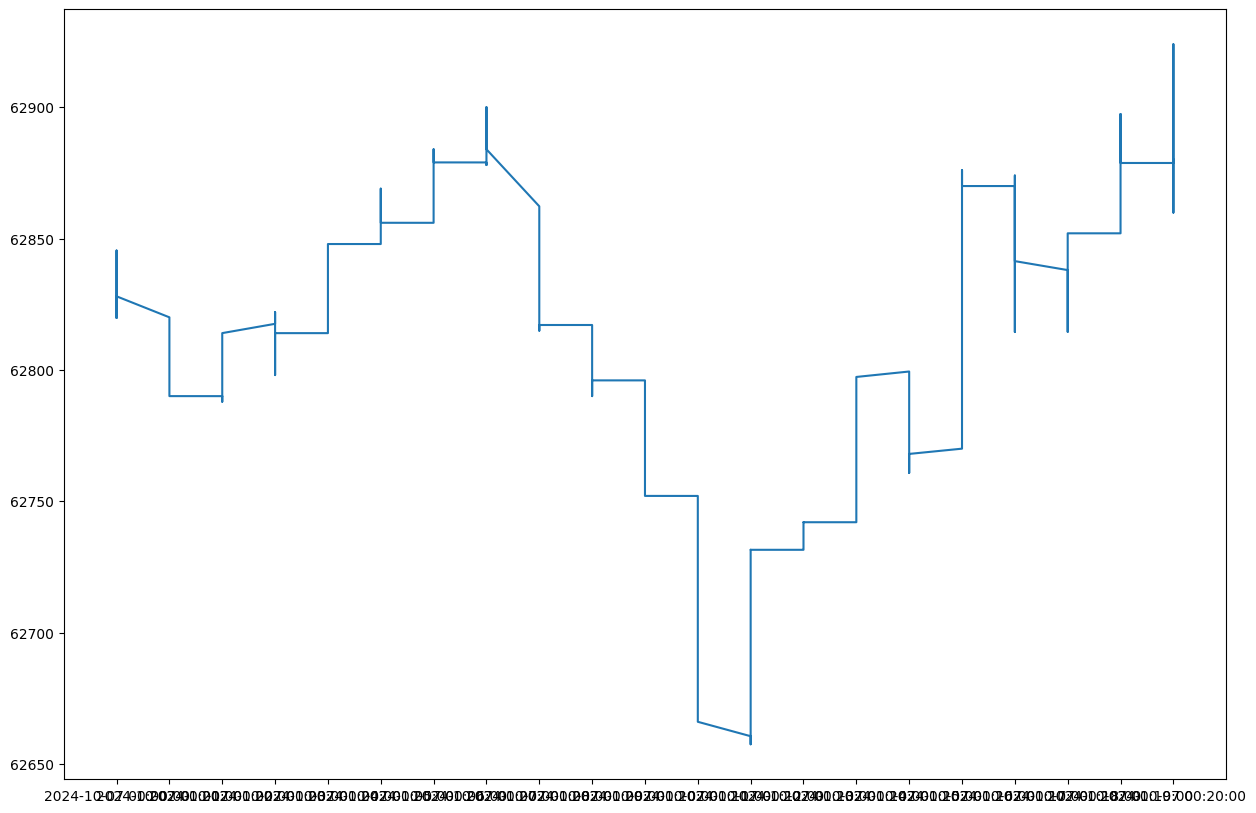

In [77]:
plt.figure(figsize=(15,10))
plt.plot(df_index["Close"].loc["2024-10-07 00:00:00":"2024-10-07 00:20:00"])

In [36]:
## Subsetting by row/column number

In [38]:
df_index

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027
...,...,...,...,...,...
2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760
2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560
2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490


In [62]:
# Get 23rd row, 2nd column (index 22, 1)
df_index.iloc[22, 1]



63350.75

In [58]:
# Use slicing to get the first 5 rows
df_index.iloc[:5]



,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027


In [59]:
# Use slicing to get columns 3 to 4
df_index.iloc[:, 2:4]



,Low,Close
Timestamp,,
2024-09-25 17:20:00,63333.27,63343.50
2024-09-25 17:20:00,63333.27,63343.51
2024-09-25 17:20:00,63333.27,63340.16
2024-09-25 17:20:00,63333.27,63340.15
2024-09-25 17:20:00,63333.27,63340.15
...,...,...
2024-10-07 16:35:00,63735.88,63759.99
2024-10-07 16:35:00,63735.88,63759.99
2024-10-07 16:35:00,63735.88,63759.99


In [60]:
# Use slicing in both directions at once
df_index.iloc[:5, 2:4]

,Low,Close
Timestamp,,
2024-09-25 17:20:00,63333.27,63343.50
2024-09-25 17:20:00,63333.27,63343.51
2024-09-25 17:20:00,63333.27,63340.16
2024-09-25 17:20:00,63333.27,63340.15
2024-09-25 17:20:00,63333.27,63340.15


In [68]:
df_pivotable = df_index.pivot_table("Close", index="Timestamp")

In [70]:
df_pivotable.mean(axis="index")

Close    63304.25691
dtype: float64

In [78]:
df

,Timestamp,Open,High,Low,Close,Volume
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027
...,...,...,...,...,...,...
777819,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760
777820,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560
777821,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490
777822,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.95626


## *Creating and Visualizing DataFrames*

<Axes: >

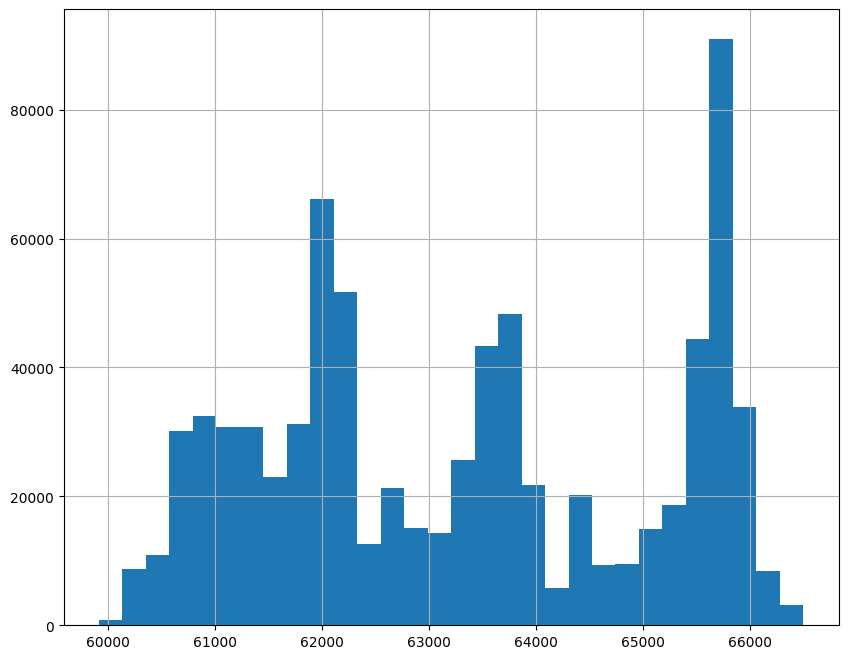

In [86]:
plt.figure(figsize=(10,8))
df['High'].hist(bins=30)

<Axes: >

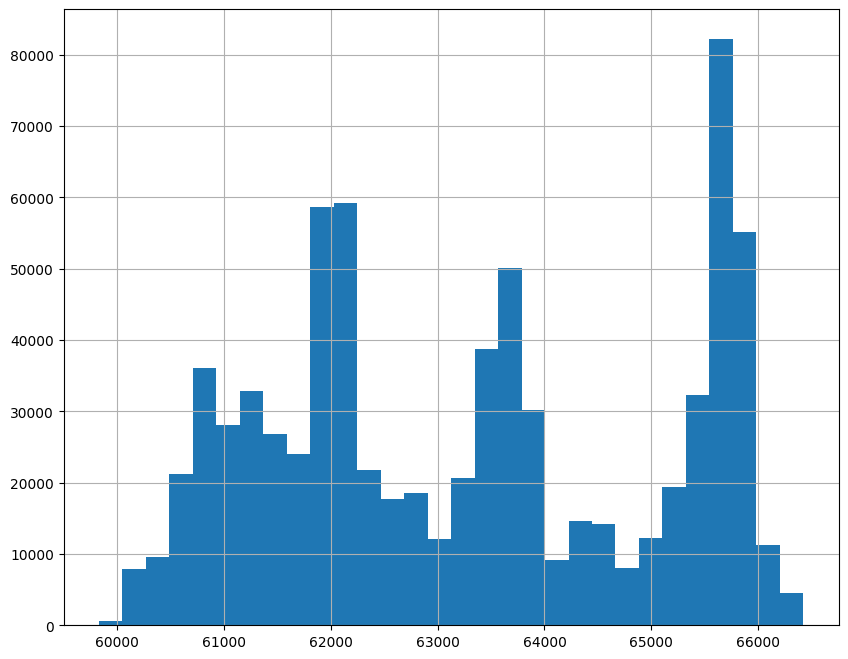

In [87]:
plt.figure(figsize=(10,8))
df['Low'].hist(bins=30)
plt.grid(True , alp

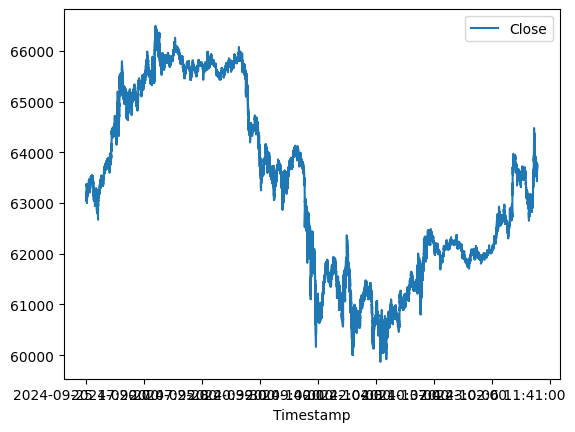

In [98]:

df.plot(x="Timestamp" , y="Close" , kind="line")
plt.show()

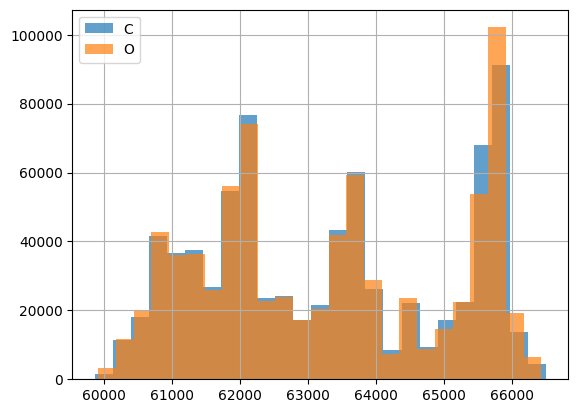

In [108]:
df["Close"].hist(bins=25 , alpha=0.7)
df["Open"].hist(bins=25 , alpha=0.7)
plt.legend(["C" , "O"])
plt.show()

In [110]:
## Detecting Missing Values

In [114]:
if True in df.isna():
    print("Missing values present in df")
else:
    print("No missing values")

No missing values


In [115]:
df.isna()

,Timestamp,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
777819,False,False,False,False,False,False
777820,False,False,False,False,False,False
777821,False,False,False,False,False,False
777822,False,False,False,False,False,False


In [116]:
df.isna().any()

Timestamp    False
Open         False
High         False
Low          False
Close        False
Volume       False
dtype: bool

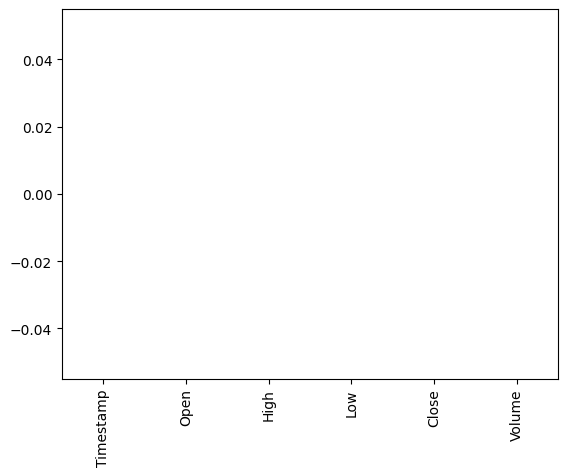

In [118]:
df.isna().sum().plot(kind="bar")
plt.show()

In [119]:
# if missing values present use dropna
df.dropna()

,Timestamp,Open,High,Low,Close,Volume
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027
...,...,...,...,...,...,...
777819,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760
777820,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560
777821,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490
777822,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.95626


In [121]:
# or replacing missing values with fillna and a specifed number
df.fillna(0)

,Timestamp,Open,High,Low,Close,Volume
0,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.50,22.01725
1,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63343.51,22.03303
2,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.16,22.15788
3,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.15983
4,2024-09-25 17:20:00,63337.45,63360.0,63333.27,63340.15,22.16027
...,...,...,...,...,...,...
777819,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.86760
777820,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.88560
777821,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.90490
777822,2024-10-07 16:35:00,63735.88,63760.0,63735.88,63759.99,1.95626


In [122]:
## Creating DataFrames

In [129]:
my_dict = {"title" : "STFT",
          "author" : "James Hamilton",
          "published" : [1965,  1966, 1968 , 1969 , 1970, 1987] , 
           " edition " : [1 , 2, 3 ,4 ,5 ,6]
          }

In [130]:
new_df = pd.DataFrame(my_dict)
new_df

,title,author,published,edition
0,STFT,James Hamilton,1965,1
1,STFT,James Hamilton,1966,2
2,STFT,James Hamilton,1968,3
3,STFT,James Hamilton,1969,4
4,STFT,James Hamilton,1970,5
5,STFT,James Hamilton,1987,6


In [131]:
## reading and writing CSVs

In [133]:
# df to csv

new_df.to_csv("books.csv")


# this will create a csv of df and automatically export into your local env